In [ ]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"


--2024-03-03 17:02:53--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [         <=>        ]  52.85M  12.6MB/s    in 5.0s    

2024-03-03 17:02:59 (10.6 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [2]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [ ]:
data = pd.read_csv("airbnb-listings.csv", sep = ';')
data = data.dropna(subset=['Price'])
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,16536728,https://www.airbnb.com/rooms/16536728,20170407214119,2017-04-08,Ático en el Barrio de Salamanca,Precioso ático en el barrio de Salamanca. Dos...,NaN,Precioso ático en el barrio de Salamanca. Dos...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"40.43007580267911,-3.674373225929859","Host Has Profile Pic,Is Location Exact,Require..."
1,14800288,https://www.airbnb.com/rooms/14800288,20170407214119,2017-04-08,"Salamanca Comfort XI, Friendly Rentals","Lugares de interés: Fide, Bienmesabe, Restaura...",Apartamento de nueva construcción (julio 2016)...,Apartamento de nueva construcción (julio 2016)...,none,"Localizado en el distrito de Salamanca, uno de...",...,8.0,10.0,9.0,NaN,NaN,strict,145,0.79,"40.43561324649597,-3.678321445006713","Host Has Profile Pic,Is Location Exact,Require..."
2,12357427,https://www.airbnb.com/rooms/12357427,20170407214119,2017-04-08,Apt. by the music Conservatory!!,Very bright apartment with 2 bedrooms 1 with p...,NaN,Very bright apartment with 2 bedrooms 1 with p...,none,NaN,...,8.0,8.0,8.0,NaN,NaN,flexible,1,0.43,"40.446440723481764,-3.6742595345116214","Host Has Profile Pic,Host Identity Verified,Is..."
3,7984552,https://www.airbnb.com/rooms/7984552,20170407214119,2017-04-08,Double Room near RealMadrid Stadium,The flat is on the ground floor. There's a com...,Cosy large room for two people with a flat TV ...,The flat is on the ground floor. There's a com...,none,Chamartín is an administrative district of Mad...,...,NaN,NaN,NaN,NaN,NaN,moderate,2,NaN,"40.455167347211834,-3.698099022915008","Host Is Superhost,Host Has Profile Pic,Is Loca..."
4,17244421,https://www.airbnb.com/rooms/17244421,20170407214119,2017-04-08,Mid Century Flat,Mi alojamiento es bueno para viajeros de negoc...,NaN,Mi alojamiento es bueno para viajeros de negoc...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43988285945364,-3.71737227282086","Host Has Profile Pic,Is Location Exact,Require..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,12185821,https://www.airbnb.com/rooms/12185821,20170407214119,2017-04-08,Apartamento completo una habitación,Hola! Nuestro apartamento es un lugar acogedor...,"Muy acogedor, y tenemos un ventanal que da a l...",Hola! Nuestro apartamento es un lugar acogedor...,none,Es una zona muy céntrica donde tomarte unas ca...,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.397772302001854,-3.6945501615175997","Host Has Profile Pic,Host Identity Verified,Is..."
13997,799569,https://www.airbnb.com/rooms/799569,20170407214119,2017-04-08,"PENTHOUSE/TERRACE, THE CITY CENTER",A charming and beautiful 2 independents bedroo...,A charming and beautiful 2 bedroom attic The a...,A charming and beautiful 2 independents bedroo...,none,Malasaña is considered the Bohemian district M...,...,10.0,10.0,9.0,NaN,NaN,strict,2,2.40,"40.42579998148187,-3.7040803907189943","Host Has Profile Pic,Is Location Exact,Require..."
13998,15542212,https://www.airbnb.com/rooms/15542212,20170407214119,2017-04-08,Cozy & Centric 1BD - Conde Duque,Calm and confortable apartment. Totally renewe...,Calm and confortable apartment. Totally renewe...,Calm and confortable apartment. Totally renewe...,none,Conde Duque is a dynamic and central neighborh...,...,10.0,10.0,9.0,NaN,NaN,flexible,1,0.94,"40.42616571464884,-3.7077944204488813","Host Has Profile Pic,Host Identity Verified,Is..."
13999,14725727,https://www.airbnb.com/rooms/14725727,20170407214119,2017-04-08,Room near Madrid downtown,"Highlight Places: Plaza España, Conde Duque Cu...",It is well located for access to central touri...,"Highlight Places: Plaza España, Conde Duque Cu...",none,"The neighborhood has many shops (Zara, El Cort...",

In [ ]:
# Filtro los datos para la ciudad de madrid
data_madrid = data.loc[data['City'] == 'Madrid']
data_madrid.shape

(13198, 89)

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=np.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

In [ ]:
images, idxs = download_images(data_madrid['Thumbnail Url'], max_imgs=4000)
images = images.astype("float32") / 255.
images.shape

100%|██████████| 4000/4000 [18:30<00:00,  3.60it/s]


(2518, 224, 224, 3)

In [ ]:
filtered_data = data_madrid.iloc[idxs]
filtered_data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
1,14800288,https://www.airbnb.com/rooms/14800288,20170407214119,2017-04-08,"Salamanca Comfort XI, Friendly Rentals","Lugares de interés: Fide, Bienmesabe, Restaura...",Apartamento de nueva construcción (julio 2016)...,Apartamento de nueva construcción (julio 2016)...,none,"Localizado en el distrito de Salamanca, uno de...",...,8.0,10.0,9.0,NaN,NaN,strict,145,0.79,"40.43561324649597,-3.678321445006713","Host Has Profile Pic,Is Location Exact,Require..."
2,12357427,https://www.airbnb.com/rooms/12357427,20170407214119,2017-04-08,Apt. by the music Conservatory!!,Very bright apartment with 2 bedrooms 1 with p...,NaN,Very bright apartment with 2 bedrooms 1 with p...,none,NaN,...,8.0,8.0,8.0,NaN,NaN,flexible,1,0.43,"40.446440723481764,-3.6742595345116214","Host Has Profile Pic,Host Identity Verified,Is..."
4,17244421,https://www.airbnb.com/rooms/17244421,20170407214119,2017-04-08,Mid Century Flat,Mi alojamiento es bueno para viajeros de negoc...,NaN,Mi alojamiento es bueno para viajeros de negoc...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43988285945364,-3.71737227282086","Host Has Profile Pic,Is Location Exact,Require..."
5,5950534,https://www.airbnb.com/rooms/5950534,20170407214119,2017-04-08,Beautifull Doble-Bed Room,Ubicacción is super (Metro Guzman el Bueno 2 m...,NaN,Ubicacción is super (Metro Guzman el Bueno 2 m...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.44584215195265,-3.7098151705375364","Host Has Profile Pic,Is Location Exact,Require..."
6,15449251,https://www.airbnb.com/rooms/15449251,20170407214119,2017-04-08,"Central Apartment, 2 rooms, Royal Palace.","Wonderful apartment in full center of Madrid, ...",Our house is cozy and perfect to rest after a ...,"Wonderful apartment in full center of Madrid, ...",none,The zone possesses shops as well as bars and r...,...,8.0,10.0,9.0,NaN,NaN,strict,1,1.24,"40.42139480164567,-3.717879233014972","Host Has Profile Pic,Requires License,Instant ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,13665156,https://www.airbnb.com/rooms/13665156,20170407214119,2017-04-08,Habitación centrica,Cama doble y una sencilla te nevera terraza ex...,NaN,Cama doble y una sencilla te nevera terraza ex...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.14,"40.421739616882846,-3.7068096112073823","Host Is Superhost,Host Has Profile Pic,Require..."
4255,5781150,https://www.airbnb.com/rooms/5781150,20170407214119,2017-04-08,"BARCELÓ, Madrid, Friendly Rentals","A classy, tasteful apartment located in a full...","A classy, tasteful apartment located in a full...","A classy, tasteful apartment located in a full...",none,"In the district of Chamberí, bordering on Mala...",...,10.0,10.0,10.0,NaN,NaN,strict,145,0.21,"40.42768404558797,-3.699675690056135","Host Has Profile Pic,Is Location Exact,Require..."
4256,9667399,https://www.airbnb.com/rooms/9667399,20170407214119,2017-04-08,BBC Rooms (Con baño privado ),BBC Rooms Airport-Barajas se encuentran a solo...,NaN,BBC Rooms Airport-Barajas se encuentran a solo...,none,NaN,...,9.0,9.0,9.0,NaN,NaN,flexible,15,0.79,"40.47478950687402,-3.578084058022845","Host Has Profile Pic,Host Identity Verified,Is..."
4257,14366176,https://www.airbnb.com/rooms/14366176,20170407214119,2017-04-08,Apartamento completo céntrico en Madrid Río.,Te va a encantar mi alojamiento por la ubicaci...,"Es un apartamento con todas las comodidades, d...",Te va a encantar mi alojamiento por la ubicaci...,none,"Es una zona muy tranquila, (Glorieta de Cadiz)...",...,10.0,9.0,10.0,NaN,NaN,strict,1,4.94,"40.38596686803499,-3.698539126780821","Host Has Profile Pic,Requires License,Instant ..."


In [ ]:
np.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

from google.colab import drive
drive.mount('/content/drive')

!cp images.npy /content/drive/MyDrive/images_final4000.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data4000.csv

Mounted at /content/drive


In [ ]:
!ls -lah images* filtered*

-rw-r--r-- 1 root root 9.5M Mar  3 17:22 filtered_data.csv
-rw-r--r-- 1 root root 1.5G Mar  3 17:22 images.npy


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
saved_data = pd.read_csv("/content/drive/MyDrive/filtered_data4000.csv", sep=';')
saved_imgs = np.load("/content/drive/MyDrive/images_final4000.npy")
saved_data.shape, saved_imgs.shape

((2508, 89), (2508, 224, 224, 3))

In [16]:
# Creo una funcion paara darle clase a la columna de precio
def price_to_class(price):

  if price <= 32:
    return 0 # Rango más barato
  elif 32 < price <= 75:
    return 1 # Rango intermedio
  else:
    return 2 # Rango caro

In [17]:
# separamos de dataset en train, X_train_image, test


from sklearn.model_selection import train_test_split

(X_train, X_test, X_train_image, X_test_image, y_train, y_test) = train_test_split(saved_data, saved_imgs, saved_data['Price'], test_size=0.2, shuffle=True, random_state=0)


X_train.to_csv('train_filtered_data.csv', sep=';', index=False)
X_test.to_csv('test_filtered_data.csv', sep=';', index=False)

X_train = pd.read_csv('train_filtered_data.csv', sep=';')
X_test = pd.read_csv('test_filtered_data.csv', sep=';')

print('Datos X_train: ', X_train.shape)
print('Datos X_test:  ', X_test.shape)
print('Datos X_train_image: ', X_train_image.shape)
print('Datos X_test_image:  ', X_test_image.shape)
print('Datos y_train: ', y_train.shape)
print('Datos y_test:  ', y_test.shape)

Datos X_train:  (2006, 89)
Datos X_test:   (502, 89)
Datos X_train_image:  (2006, 224, 224, 3)
Datos X_test_image:   (502, 224, 224, 3)
Datos y_train:  (2006,)
Datos y_test:   (502,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Borro las columnas que no me interesan despues de un estudio de ellas y la columna Price que es la columna objetivo


X_train = X_train.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
                              'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
                              'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID',
                              'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                              'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
                              'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications',
                              'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
                              'Smart Location', 'Country Code', 'Country', 'Amenities', 'Square Feet',
                              'Weekly Price', 'Monthly Price', 'Security Deposit', 'Maximum Nights',
                              'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90',
                              'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review',
                              'Review Scores Accuracy','Review Scores Checkin', 'Review Scores Communication',
                              'Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count',
                              'Reviews per Month', 'Geolocation', 'Features','Minimum Nights', 'Review Scores Rating', 'Review Scores Cleanliness',
                              'Review Scores Location','Price'],axis=1)


# Codifico las variables categoricas con labelEncoder



le_Neighbourhood_Cleansed = LabelEncoder()
le_Property_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_Bed_Type = LabelEncoder()
le_Cancellation_Policy = LabelEncoder()

X_train['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(X_train['Neighbourhood Cleansed'])
X_train['Property Type'] = le_Property_Type.fit_transform(X_train['Property Type'])
X_train['Room Type'] = le_Room_Type.fit_transform(X_train['Room Type'])
X_train['Bed Type'] = le_Bed_Type.fit_transform(X_train['Bed Type'])
X_train['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(X_train['Cancellation Policy'])

# Viendo los resultados de registros nan, voy a imputar los valores nan en la variable Cleaning fee como valores 0 porque
# tomo esos valores nan como que no tiene tasa de limpieza
# media o 0 me quedo con la imputacion 0

X_train["Cleaning Fee"].fillna(0, inplace=True)

# Dados los resultados realizados abajo de las medias y las modas, voy a imputar las columnas con las medias

# Imputo a los valores nan con la media obtenida de cada columna

columnas_con_nan = X_train.columns[X_train.isna().any()].tolist()
for i in columnas_con_nan:
    media_columna = X_train[i].mean()
    X_train[i] = X_train[i].fillna(media_columna)



# hago lo mismo que he hecho en los datos train , en los datos de test



X_test = X_test.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
                              'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
                              'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID',
                              'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                              'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
                              'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications',
                              'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
                              'Smart Location', 'Country Code', 'Country', 'Amenities', 'Square Feet',
                              'Weekly Price', 'Monthly Price', 'Security Deposit', 'Maximum Nights',
                              'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90',
                              'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review',
                              'Review Scores Accuracy','Review Scores Checkin', 'Review Scores Communication',
                              'Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count',
                              'Reviews per Month', 'Geolocation', 'Features','Minimum Nights', 'Review Scores Rating', 'Review Scores Cleanliness',
                              'Review Scores Location','Price'],axis=1)


# Codifico las variables categoricas con labelEncoder

from sklearn.preprocessing import LabelEncoder

le_Neighbourhood_Cleansed = LabelEncoder()
le_Property_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_Bed_Type = LabelEncoder()
le_Cancellation_Policy = LabelEncoder()

X_test['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(X_test['Neighbourhood Cleansed'])
X_test['Property Type'] = le_Property_Type.fit_transform(X_test['Property Type'])
X_test['Room Type'] = le_Room_Type.fit_transform(X_test['Room Type'])
X_test['Bed Type'] = le_Bed_Type.fit_transform(X_test['Bed Type'])
X_test['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(X_test['Cancellation Policy'])

# voy a imputar los valores nan en la variable Cleaning fee como valores 0

X_test["Cleaning Fee"].fillna(0, inplace=True)

# Dados los resultados realizados abajo de las medias y las modas, voy a imputar las columnas con las medias
# Imputo a los valores nan con la media obtenida de cada columna

columnas_con_nan = X_test.columns[X_test.isna().any()].tolist()
for i in columnas_con_nan:
    media_columna = X_test[i].mean()
    X_test[i] = X_test[i].fillna(media_columna)








print('Datos X_train: ', X_train.shape)
print('Datos X_test:  ', X_test.shape)
print('Datos y_train: ', y_train.shape)
print('Datos y_test:  ', y_test.shape)

Datos X_train:  (2006, 14)
Datos X_test:   (502, 14)
Datos y_train:  (2006,)
Datos y_test:   (502,)


In [19]:
# Codificar las clases como números y hacer el one hot encoding con to categorical

from tensorflow.keras.utils import to_categorical

y_train = np.array([price_to_class(price) for price in y_train])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

y_test = np.array([price_to_class(price) for price in y_test])
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

# Convertir etiquetas de clase a one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print('Datos X_train: ', X_train.shape)
print('Datos X_test:  ', X_test.shape)
print('Datos y_train: ', y_train.shape)
print('Datos y_test:  ', y_test.shape)

Datos X_train:  (2006, 14)
Datos X_test:   (502, 14)
Datos y_train:  (2006, 3)
Datos y_test:   (502, 3)


In [11]:
X_train.columns

Index(['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Cancellation Policy'],
      dtype='object')

In [20]:
# Escalo los datos de X_train y  X_test y y
# separo lo datos X_train ---> X_train1  y  X_val1
# separo lo datos y_train --> y_train_val  y  y_val_tab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dividimos los datos
X_train1, X_val1,X_train_image1, X_val_image1, Y_train_tab, Y_val_tab = train_test_split(X_train,X_train_image, y_train, test_size=0.15, random_state=42)

In [21]:
print('Datos train: ', X_train1.shape)
print('Datos train:  ', Y_train_tab.shape)
print('Datos val: ', X_val1.shape)
print('Datos val:  ', Y_val_tab.shape)

Datos train:  (1705, 14)
Datos train:   (1705, 3)
Datos val:  (301, 14)
Datos val:   (301, 3)


[INFO]: Entrenando red neuronal...
[INFO]: Entrenando red neuronal...
Epoch 1/150
14/14 [==============================] - 1s 24ms/step - loss: 1.0772 - accuracy: 0.3654 - val_loss: 1.0300 - val_accuracy: 0.5681
Epoch 2/150
14/14 [==============================] - 0s 8ms/step - loss: 0.9976 - accuracy: 0.6340 - val_loss: 0.9664 - val_accuracy: 0.6346
Epoch 3/150
14/14 [==============================] - 0s 6ms/step - loss: 0.9389 - accuracy: 0.6792 - val_loss: 0.9165 - val_accuracy: 0.6678
Epoch 4/150
14/14 [==============================] - 0s 8ms/step - loss: 0.8927 - accuracy: 0.6933 - val_loss: 0.8754 - val_accuracy: 0.6744
Epoch 5/150
14/14 [==============================] - 0s 7ms/step - loss: 0.8542 - accuracy: 0.6956 - val_loss: 0.8412 - val_accuracy: 0.6777
Epoch 6/150
14/14 [==============================] - 0s 7ms/step - loss: 0.8229 - accuracy: 0.6968 - val_loss: 0.8132 - val_accuracy: 0.6711
Epoch 7/150
14/14 [==============================] - 0s 7ms/step - loss: 0.7975 - a

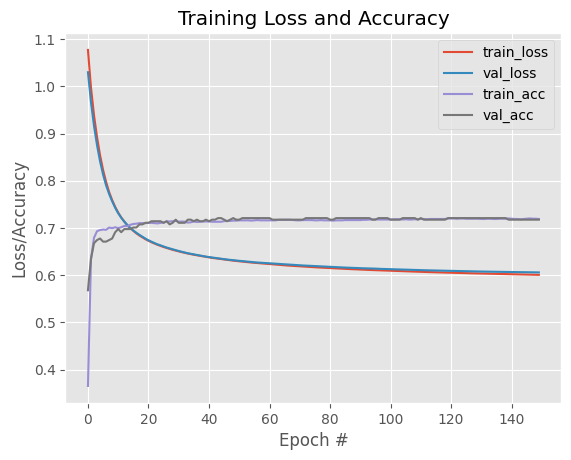

In [29]:
# Creo el modelo de datos tabulares
# Imports necesarios

import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


num_epochs=150
# Implementamos la red empleando Keras
model_t = Sequential()
model_t.add(Dense(32, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros",name="capa_densa"))
model_t.add(Dense(3, input_dim=X_train.shape[1], activation="softmax"))

# Compilamos y entrenamos el modelo Adam
print("[INFO]: Entrenando red neuronal...")
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.001,
    decay_steps=1,
    decay_rate=0.01)
print("[INFO]: Entrenando red neuronal...")
model_t.compile(loss="categorical_crossentropy", optimizer=Adam(lr_schedule), metrics=["accuracy"])  #(X)

# Entrenando la solución
H = model_t.fit(X_train1, Y_train_tab, validation_data=(X_val1, Y_val_tab), epochs=num_epochs, batch_size=128)  #(X)

# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model_t.predict(X_test, batch_size=128)  #(X)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [25]:
print('Datos train: ', X_train_image1.shape)
print('Datos train:  ', Y_train_tab.shape)
print('Datos val: ', X_val_image1.shape)
print('Datos valt:  ', Y_val_tab.shape)
print('Datos test: ', X_test_image.shape)
print('Datos test:  ', y_test.shape)

Datos train:  (1705, 224, 224, 3)
Datos train:   (1705, 3)
Datos val:  (301, 224, 224, 3)
Datos valt:   (301, 3)
Datos test:  (502, 224, 224, 3)
Datos test:   (502, 3)


Epoch 1/10
54/54 [==============================] - 14s 228ms/step - loss: 2.4952 - accuracy: 0.4152 - val_loss: 0.9835 - val_accuracy: 0.5116
Epoch 2/10
54/54 [==============================] - 11s 204ms/step - loss: 0.9489 - accuracy: 0.5255 - val_loss: 0.9591 - val_accuracy: 0.5150
Epoch 3/10
54/54 [==============================] - 12s 216ms/step - loss: 0.8737 - accuracy: 0.5994 - val_loss: 0.9918 - val_accuracy: 0.4917
Epoch 4/10
54/54 [==============================] - 10s 191ms/step - loss: 0.8113 - accuracy: 0.6229 - val_loss: 0.9416 - val_accuracy: 0.5150
Epoch 5/10
54/54 [==============================] - 10s 190ms/step - loss: 0.7573 - accuracy: 0.6581 - val_loss: 0.9588 - val_accuracy: 0.5714
Epoch 6/10
54/54 [==============================] - 10s 190ms/step - loss: 0.7138 - accuracy: 0.7044 - val_loss: 0.9621 - val_accuracy: 0.5548
Epoch 7/10
54/54 [==============================] - 11s 209ms/step - loss: 0.6695 - accuracy: 0.7284 - val_loss: 0.9584 - val_accuracy: 0.5282

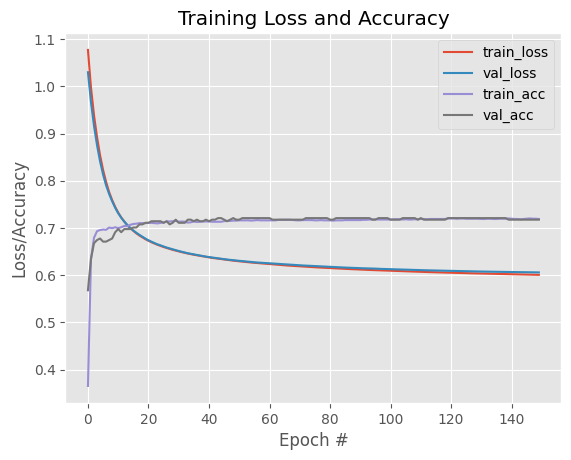

In [30]:
# Creo el modelo convolucional utilizando una red preentrenada en este caso VGG19
# Imports necesarios

from tensorflow.keras.applications import InceptionV3, Xception, VGG16, VGG19, ResNet50
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# Cargar el modelo preentrenado
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas convolucionales modelo
for layer in base_model.layers:
  layer.trainable = False


# ponemos el tipo de modelo
model_I = Sequential()


# Agregar capas
model_I.add(base_model)
model_I.add(Flatten(name="capa_flatten"))
model_I.add(Dense(512, activation='relu'))
model_I.add(Dropout(0.5))
model_I.add(Dense(3, activation='softmax'))

# Compilar el modelo
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True
)
model_I.compile(loss='categorical_crossentropy',
                    optimizer=Adam(learning_rate=lr_schedule),
                    metrics=['accuracy'])


# Entrenar el modelo
model_I.fit(X_train_image1, Y_train_tab,
                 batch_size=32,
                 shuffle=True,
                 epochs=10,
                 validation_data=(X_val_image1, Y_val_tab))

# Evaluar el modelo

# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model_t.predict(X_test, batch_size=128)  #(X)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))
scores = model_I.evaluate(X_test_image, y_test)

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [31]:
# Saco las imagenes despues de la capa flatten para que sean un vector, para utilizar como input del modelo de fusion
# voy a utilizar early-fusion por eso utilizo las imagenes despues de la capa flatten
# Utilizo PCA para quedarme con las dimensiones del vector que quiero
# Imports necesarios

from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Input
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA

# Escojo la capa flatten de mi red convolucional y creo un modelo para obtener las caracteristicas que salen de flatten
imagenes_flatten = model_I.layers.index(model_I.get_layer('capa_flatten'))
feature_extractor_model = Model(inputs=model_I.input, outputs=model_I.layers[imagenes_flatten].output)

# Obtenengo las predicciones  (antes de clasificacion )
image_features = feature_extractor_model.predict(X_train_image)
image_features_test = feature_extractor_model.predict(X_test_image)

# Aplico PCA para obtener las dimensiones que me interesan
n_components = 50
pca = PCA(n_components=n_components)
input_imagenes = pca.fit_transform(image_features)
input_imagenes_test = pca.fit_transform(image_features_test)



16/16 [==============================] - 2s 163ms/step


In [32]:
input_imagenes.shape

(2006, 50)

In [33]:
# Obtener la capa deseada del mi modelo fully conected
ultima_capa_tabular = model_t.get_layer('capa_densa')
model_t_predictions = Model(inputs=model_t.input, outputs=ultima_capa_tabular.output)

# Obtengo las características de esa capa (antes de clasificacion )
caracteristicas_tabulares= model_t_predictions.predict(X_train)
caracteristicas_tabulares_test = model_t_predictions.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [34]:
# Concatenar las características tabulares con las características de las imágenes
caracteristicas_entrada = np.concatenate((input_imagenes, caracteristicas_tabulares), axis=1)
caracteristicas_test = np.concatenate((input_imagenes_test, caracteristicas_tabulares_test), axis=1)

In [35]:
# Me aseguro que tengo el shape adecuado para que el modelo de fusion funcione correctamente


print( 'shape datos imagenes : ',input_imagenes.shape)
print( 'shape datos tabulares : ',caracteristicas_tabulares.shape)
print( 'shape union : ',caracteristicas_entrada.shape)
print( 'shape datos objetivo train : ',y_train.shape)
print( 'shape datos imagenes test : ',input_imagenes_test.shape)
print( 'shape datos tabulares test : ',caracteristicas_tabulares_test.shape)
print( 'shape union : ',caracteristicas_test.shape)
print( 'shape datos objetivo test : ',y_test.shape)


shape datos imagenes :  (2006, 50)
shape datos tabulares :  (2006, 32)
shape union :  (2006, 82)
shape datos objetivo train :  (2006, 3)
shape datos imagenes test :  (502, 50)
shape datos tabulares test :  (502, 32)
shape union :  (502, 82)
shape datos objetivo test :  (502, 3)


In [36]:
# Dividimos los datos para hacer el ultimp modelo ( fusion )
X_train_fusion, X_val_fusion, y_train_fusion, y_val_fusion = train_test_split(caracteristicas_entrada, y_train, test_size=0.15, random_state=42)

In [37]:
# Creo el modelo final

model_fusion = Sequential()
model_fusion.add(Dense(1024, activation='relu', input_dim=caracteristicas_entrada.shape[1]))
model_fusion.add(Dropout(0.5))

model_fusion.add(Dense(3, activation='softmax'))

# Compilo el modelo final

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True
)
model_fusion.compile(loss='categorical_crossentropy',
                    optimizer=Adam(learning_rate=lr_schedule),
                    metrics=['accuracy'])

# Entreno el modelo final
model_fusion.fit(X_train_fusion, y_train_fusion,
                 batch_size=32,
                 shuffle=True,
                 epochs=10,
                 validation_data=(X_val_fusion, y_val_fusion))

# Evaluo el modelo final
scores_fusion = model_fusion.evaluate(caracteristicas_test, y_test)

print('Loss: %.3f' % scores_fusion[0])
print('Accuracy: %.3f' % scores_fusion[1])


Epoch 1/10
54/54 [==============================] - 2s 7ms/step - loss: 0.9898 - accuracy: 0.5437 - val_loss: 0.6793 - val_accuracy: 0.6478
Epoch 2/10
54/54 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.6909 - val_loss: 0.6569 - val_accuracy: 0.7043
Epoch 3/10
54/54 [==============================] - 0s 5ms/step - loss: 0.5948 - accuracy: 0.7548 - val_loss: 0.6611 - val_accuracy: 0.7010
Epoch 4/10
54/54 [==============================] - 0s 4ms/step - loss: 0.5437 - accuracy: 0.7677 - val_loss: 0.6587 - val_accuracy: 0.7110
Epoch 5/10
54/54 [==============================] - 0s 4ms/step - loss: 0.5495 - accuracy: 0.7507 - val_loss: 0.6599 - val_accuracy: 0.6977
Epoch 6/10
54/54 [==============================] - 0s 4ms/step - loss: 0.5089 - accuracy: 0.7795 - val_loss: 0.6599 - val_accuracy: 0.6910
Epoch 7/10
54/54 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7836 - val_loss: 0.6619 - val_accuracy: 0.6910
Epoch 8/10
54/54 [==